In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
data_path = '/Users/jun/GitStudy/Data_4/Data/eCommerce3'
os.chdir(data_path)

In [3]:
retail = pd.read_csv('capstone_data_cleaned.csv')
retail.head(4)

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,price,...,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,10/2/2017 10:56,10/2/2017 11:07,10/10/2017 21:25,10/18/2017 0:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,...,1,18.12,housewares,500.0,19.0,8.0,13.0,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,10/2/2017 10:56,10/2/2017 11:07,10/10/2017 21:25,10/18/2017 0:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,...,1,18.12,housewares,500.0,19.0,8.0,13.0,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,10/2/2017 10:56,10/2/2017 11:07,10/10/2017 21:25,10/18/2017 0:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,...,1,2.00,housewares,500.0,19.0,8.0,13.0,3149,sao paulo,SP
3,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,10/2/2017 10:56,10/2/2017 11:07,10/10/2017 21:25,10/18/2017 0:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,...,1,2.00,housewares,500.0,19.0,8.0,13.0,3149,sao paulo,SP


In [4]:
retail['order_item_id'] = retail['order_item_id'].astype(str)
retail['customer_zip_code_prefix'] = retail['customer_zip_code_prefix'].astype(str)
retail['order_purchase_timestamp'] = pd.to_datetime(retail['order_purchase_timestamp'])
retail['order_delivered_timestamp'] = pd.to_datetime(retail['order_delivered_timestamp'])
retail['order_estimated_delivery_date'] = pd.to_datetime(retail['order_estimated_delivery_date'])
retail['order_approved_at']=pd.to_datetime(retail['order_approved_at'])
retail['total_payment'] = retail['price'] + retail['shipping_charges']
retail['volume'] = retail['product_height_cm'] * retail['product_length_cm'] * retail['product_width_cm']

columns_to_remove = ['order_estimated_delivery_date', 'shipping_charges', 'price', 'payment_value','customer_city','order_approved_at']
retail = retail.drop(columns=columns_to_remove)


In [5]:
retail['product_category_name'].unique()

array(['housewares', 'baby', 'toys', 'audio', 'furniture_decor',
       'bed_bath_table', 'health_beauty', 'computers_accessories',
       'watches_gifts', 'electronics', 'air_conditioning',
       'sports_leisure', 'stationery', 'garden_tools',
       'construction_tools_construction', 'small_appliances', 'telephony',
       'luggage_accessories', 'construction_tools_safety', 'perfumery',
       'home_appliances_2', 'office_furniture', 'home_construction',
       'fashion_underwear_beach', 'musical_instruments', 'pet_shop',
       'costruction_tools_garden', 'cool_stuff', 'home_appliances',
       'auto', 'market_place', 'home_confort', 'party_supplies',
       'industry_commerce_and_business', 'fashion_bags_accessories',
       'fashion_shoes', 'fixed_telephony', 'books_general_interest',
       'consoles_games', 'furniture_living_room',
       'kitchen_dining_laundry_garden_furniture', 'food', 'drinks',
       'construction_tools_lights', 'christmas_supplies',
       'tablets_printi

In [6]:
electronics =  [
        "audio", "computers_accessories", "electronics", 
        "telephony", "tablets_printing_image", "computers", "cine_photo",  
        "dvds_blu_ray", "fixed_telephony"]


food = ["food", "drinks", "food_drink", "la_cuisine"]


toys = ["toys","consoles_games"]

home_appliances =[ "home_appliances", "home_appliances_2" ]

furniture = [
        "housewares", "furniture_decor", "bed_bath_table",
        "kitchen_dining_laundry_garden_furniture", 
        "furniture_living_room", "furniture_bedroom",
        "furniture_mattress_and_upholstery", "home_confort", "home_comfort_2", 
        "office_furniture"]

construction = ["costruction_tools_tools", "construction_tools_lights","construction_tools_safety", "home_construction", "construction_tools_construction"]

garden = ["garden_tools","flowers","costruction_tools_garden"]


fashion_beauty = [
        "fashion_bags_accessories", "fashion_shoes", "fashion_male_clothing", "watches_gifts",
        "fashio_female_clothing", "fashion_childrens_clothes", 
        "fashion_underwear_beach", "fashion_sport","cool_stuff", "health_beauty", "perfumery","luggage_accessories","sports_leisure"
    ]

baby_products = [ "baby","diapers_and_hygiene"]

arts_hobbies =  [ "art", "arts_and_craftmanship", "music", "musical_instruments", 
                "books_general_interest", "books_technical", "books_imported", 
        "christmas_supplies", "stationery", "party_supplies"]

industry = ["industry_commerce_and_business", "agro_industry_and_commerce", "market_place"]

security = ["signaling_and_security", "security_and_services" ]
pet = ["pet_shop"]
auto = ["auto"]

In [7]:
def categorize_product(row):
    if row in electronics:
        return 'electronics'
    elif row in food:
        return 'food'
    elif row in toys:
        return 'toys'
    elif row in home_appliances:
        return 'home_appliances'
    elif row in furniture:
        return 'furniture'
    elif row in construction:
        return 'construction'
    elif row in garden:
        return 'garden'
    elif row in fashion_beauty:
        return 'fashion_beauty'
    elif row in baby_products:
        return 'baby_products'
    elif row in arts_hobbies:
        return 'arts_hobbies'
    elif row in industry:
        return 'industry'
    elif row in security:
        return 'security'
    elif row in pet:
        return 'pet'
    elif row in auto:
        return 'auto'
    else:
        return 'other'

# retail['product_category_name'] 컬럼을 새로운 카테고리로 분류
retail['category'] = retail['product_category_name'].apply(categorize_product)
retail = retail.drop(columns='product_category_name')

In [8]:
retail['category'].unique()

array(['furniture', 'baby_products', 'toys', 'electronics',
       'fashion_beauty', 'other', 'arts_hobbies', 'garden',
       'construction', 'home_appliances', 'pet', 'auto', 'industry',
       'food', 'security'], dtype=object)

In [9]:
#retail = retail.drop_duplicates()
retail = retail.reset_index(drop=True)
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119614 entries, 0 to 119613
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   order_id                   119614 non-null  object        
 1   customer_id                119614 non-null  object        
 2   order_purchase_timestamp   119614 non-null  datetime64[ns]
 3   order_delivered_timestamp  119614 non-null  datetime64[ns]
 4   order_item_id              119614 non-null  object        
 5   product_id                 119614 non-null  object        
 6   seller_id                  119614 non-null  object        
 7   payment_type               119614 non-null  object        
 8   payment_installments       119614 non-null  int64         
 9   product_weight_g           119614 non-null  float64       
 10  product_length_cm          119614 non-null  float64       
 11  product_height_cm          119614 non-null  float64 

In [10]:
payment_list = sorted(retail['payment_type'].unique())

# 그룹화된 payment_type을 sorted된 순서로 결합
result = (
    retail[['order_id', 'payment_type']]
    .groupby('order_id')['payment_type']
    .apply(lambda x: '/'.join(sorted(set(x), key=lambda y: payment_list.index(y))))
    .reset_index()
)
result

,order_id,payment_type
0,00010242fe8c5a6d1ba2dd792cb16214,credit_card
1,000229ec398224ef6ca0657da4fc703e,credit_card
2,00024acbcdf0a6daa1e931b038114c75,credit_card
3,00042b26cf59d7ce69dfabb4e55b4fd9,credit_card
4,00048cc3ae777c65dbb7d2a0634bc1ea,wallet
...,...,...
92923,fffc94f6ce00a00581880bf54a75a037,wallet
92924,fffcd46ef2263f404302a634eb57f7eb,wallet
92925,fffce4705a9662cd70adb13d4a31832d,credit_card
92926,fffe18544ffabc95dfada21779c9644f,credit_card


In [11]:
result['payment_type'].unique()

array(['credit_card', 'wallet', 'credit_card/voucher', 'debit_card',
       'voucher', 'credit_card/debit_card'], dtype=object)

In [12]:
retail_cleaned = retail.drop(columns='payment_type')
retail_grouped = retail_cleaned.groupby('order_id').first().reset_index()
merged_df = result.merge(retail_grouped, on='order_id', how='left')

# 결과 확인
subset =   merged_df[merged_df['payment_type'].str.contains('voucher', na=False)]
subset[7:]

,order_id,payment_type,customer_id,order_purchase_timestamp,order_delivered_timestamp,order_item_id,product_id,seller_id,payment_installments,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,customer_state,total_payment,volume,category
266,00c405bd71187154a7846862f585a9d4,credit_card/voucher,58b051c30d684ac12a2049a49c856203,2017-10-23 14:59:00,2017-10-31 18:47:00,1,c4cf7c2e1f190d51517eba7e8211c8e6,f3295428338a40977a03f555246a70f4,1,200.0,17.0,8.0,12.0,44065,BA,46.69,1632.0,toys
278,00c95282163553a982f38481f9488481,credit_card/voucher,b51d73d8179d999b81550d846940a720,2017-08-09 18:27:00,2017-08-17 20:09:00,1,ef8856db4e302ad33dc4d91e40f7593c,dbc22125167c298ef99da25668e1011f,1,1350.0,41.0,10.0,35.0,27350,RJ,124.90,14350.0,toys
319,00e6bc6b166eb28b4502c1cad4457248,credit_card/voucher,36928e3de80f63dad3bd1d0223b035fc,2018-07-01 23:18:00,2018-07-05 18:27:00,1,9dae52e79d63184a0b32da87c5aabecf,d921b68bf747894be13a97ae52b0f386,2,450.0,22.0,14.0,27.0,6266,SP,151.93,8316.0,toys
356,00fc308dd7f0937682698becaa9dcc45,voucher,8e62db6f625288ad4792855f994abefd,2018-08-20 19:51:00,2018-08-28 01:52:00,1,940d38f0ef286bd93612fcdc91dd38ed,53e4c6e0f4312d4d2107a8c9cddf45cd,1,4300.0,30.0,30.0,30.0,31050,MG,104.11,27000.0,toys
438,013037c3f1773cc8fdbaf8ff54d8013b,credit_card/voucher,f25c64d74c6188c7fb8d3c58d83c6a85,2017-03-28 15:15:00,2017-04-03 16:43:00,1,5a6e53c3b4e8684b13388d6aa4afdf12,7299e27ed73d2ad986de7f7c77d919fa,1,200.0,19.0,9.0,12.0,19880,SP,30.51,2052.0,toys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92628,ff20ee702706d9e407a34de9fe2ff768,credit_card/voucher,fae05fe601dcbdbc9d5888b0f9c4b732,2018-03-28 12:11:00,2018-04-05 23:31:00,1,7b1f55eb9b85b0aa6b1d4c16108eac61,1e8b33f18b4f7598d87f5cbee2282cc2,1,1850.0,46.0,12.0,43.0,81270,PR,182.10,23736.0,toys
92733,ff7400d904161b62b6e830b3988f5cbd,credit_card/voucher,7dd466ce70871be5aba0ea1a43df6021,2018-03-27 15:37:00,2018-04-25 16:32:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,1,8683.0,54.0,64.0,31.0,40230,BA,154.96,107136.0,toys
92784,ff978de32e717acd3b5abe1fb069d2b6,voucher,7e1ca53dbea2514cb38bb0de60e8f16b,2017-12-12 09:50:00,2018-01-15 21:12:00,1,0829c25b4a3efca7651f07cd4b8e05bc,9f505651f4a6abe901a56cdc21508025,1,100.0,16.0,4.0,14.0,69007,AM,49.14,896.0,toys
92795,ffa1dd97810de91a03abd7bd76d2fed1,credit_card/voucher,26cbea974bc958bc0192ab80777f3a06,2017-05-22 22:35:00,2017-06-06 16:40:00,1,2f178dc91b792930e1ff40a77a123506,75d34ebb1bd0bd7dde40dd507b8169c3,1,369.0,15.0,13.0,13.0,72260,DF,455.31,2535.0,toys


In [13]:
merged_df.T

,0,1,2,3,4,5,6,7,8,9,...,92918,92919,92920,92921,92922,92923,92924,92925,92926,92927
order_id,00010242fe8c5a6d1ba2dd792cb16214,000229ec398224ef6ca0657da4fc703e,00024acbcdf0a6daa1e931b038114c75,00042b26cf59d7ce69dfabb4e55b4fd9,00048cc3ae777c65dbb7d2a0634bc1ea,00054e8431b9d7675808bcb819fb4a32,000576fe39319847cbb9d288c5617fa6,0005a1a1728c9d785b8e2b08b904576c,0005f50442cb953dcd1d21e1fb923495,00061f2a7bc09da83e415a52dc8a4af1,...,fffa82886406ccf10c7b4e35c4ff2788,fffb0b1a50e65c449020434fa835e078,fffb2ef8874127f75b52b643880fd7e0,fffb9224b6fc7c43ebb0904318b10b5f,fffbee3b5462987e66fb49b1c5411df2,fffc94f6ce00a00581880bf54a75a037,fffcd46ef2263f404302a634eb57f7eb,fffce4705a9662cd70adb13d4a31832d,fffe18544ffabc95dfada21779c9644f,fffe41c64501cc87c801fd61db3f6244
payment_type,credit_card,credit_card,credit_card,credit_card,wallet,credit_card,credit_card,credit_card,credit_card,credit_card,...,credit_card,credit_card,wallet,wallet,credit_card,wallet,wallet,credit_card,credit_card,credit_card
customer_id,871766c5855e863f6eccc05f988b23cb,3818d81c6709e39d06b2738a8d3a2474,af861d436cfc08b2c2ddefd0ba074622,64b576fb70d441e8f1b2d7d446e483c5,85c835d128beae5b4ce8602c491bf385,635d9ac1680f03288e72ada3a1035803,fda4476abb6307ab3c415b7e6d026526,639d23421f5517f69d0c3d6e6564cf0e,0782c41380992a5a533489063df0eef6,107e6259485efac66428a56f10801f4f,...,2a3ab9bf9639491997586882c502540a,b2d2b4204f7fc4b4aeca38e3cd680a7e,6b42acb204802253acec6607ff3a9e0b,f736308cd9952b33b90b9fe94da9c8f5,ecc3d4eb9b17d2f0865d21f2abecc51c,0c9aeda10a71f369396d0c04dce13a64,0da9fe112eae0c74d3ba1fe16de0988b,cd79b407828f02fdbba457111c38e4c4,eb803377c9315b564bdedad672039306,cd76a00d8e3ca5e6ab9ed9ecb6667ac4
order_purchase_timestamp,2017-09-13 08:59:00,2018-01-14 14:33:00,2018-08-08 10:00:00,2017-02-04 13:57:00,2017-05-15 21:42:00,2017-12-10 11:53:00,2018-07-04 12:08:00,2018-03-19 18:40:00,2018-07-02 13:59:00,2018-03-24 22:16:00,...,2017-12-18 16:33:00,2017-04-12 16:35:00,2018-03-30 15:36:00,2017-10-27 16:51:00,2018-06-19 09:27:00,2018-04-23 13:57:00,2018-07-14 10:26:00,2017-10-23 17:07:00,2017-08-14 23:02:00,2018-06-09 17:00:00
order_delivered_timestamp,2017-09-20 23:43:00,2018-01-22 13:19:00,2018-08-14 13:32:00,2017-03-01 16:42:00,2017-05-22 13:44:00,2017-12-18 22:03:00,2018-07-09 14:04:00,2018-03-29 18:17:00,2018-07-04 17:28:00,2018-03-29 00:04:00,...,2018-01-08 18:23:00,2017-05-17 11:38:00,2018-04-16 16:56:00,2017-11-17 19:41:00,2018-07-05 17:51:00,2018-05-10 22:56:00,2018-07-23 20:31:00,2017-10-28 12:22:00,2017-08-16 21:59:00,2018-06-14 17:56:00
order_item_id,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
product_id,4244733e06e7ecb4970a6e2683c13e61,c777355d18b72b67abbeef9df44fd0fd,7634da152a4610f1595efa32f14722fc,ac6c3623068f30de03045865e4e10089,ef92defde845ab8450f9d70c526ef70f,8d4f2bb7e93e6710a28f34fa83ee7d28,557d850972a7d6f792fd18ae1400d9b6,310ae3c140ff94b03219ad0adc3c778f,4535b0e1091c278dfd193e5a1d63b39f,d63c1011f49d98b976c352955b1c4bea,...,bbe7651fef80287a816ead73f065fc4b,e7be84ea9462aac5e2b0b08eb35ba7f1,ebceb9726cf5c6187b48e17fe58747b0,43423cdffde7fda63d0414ed38c11a73,6f0169f259bb0ff432bfff7d829b9946,4aa6014eceb682077f9dc4bffebc05b0,32e07fd915822b0765e448c4dd74c828,72a30483855e2eafc67aee5dc2560482,9c422a519119dcad7575db5af1ba540e,350688d9dc1e75ff97be326363655e01
seller_id,48436dade18ac8b2bce089ec2a041202,5b51032eddd242adc84c38acab88f23d,9d7a1d34a5052409006425275ba1c2b4,df560393f3a51e74553ab94004ba5c87,6426d21aca402a131fc0a5d0960a3c90,7040e82f899a04d1b434b795a43b4617,5996cddab893a4652a15592fb58ab8db,a416b6a846a11724393025641d4edd5e,ba143b05f0110f0dc71ad71b4466ce92,cc419e0650a3c5ba77189a1882b7556a,...,8f2ce03f928b567e3d56181ae20ae952,36a968b544695394e4e9d7572688598f,609e1a9a6c2539919b8205cf7c4e6ff0,b1fc4f64df5a0e8b6913ab38803c57a9,213b25e6f54661939f11710a6fddb871,b8bc237ba3788b23da09c0f1f3a3288c,f3c38ab652836d21de61fb8314b69182,c3cfdc648177fdbbbb35635a37472c53,2b3e4a2a3ea8e01938cabda2a3e5cc79,f7ccf836d21b2fb1de37564105216cc1
payment_installments,2,5,2,3,1,1,10,3,1,3,...,7,1,1,1,3,1,1,3,3,1
pr

In [14]:
#deliverd_
merged_df['delivery_hours'] = (merged_df['order_delivered_timestamp'] - merged_df['order_purchase_timestamp']).dt.total_seconds() //3600  
merged_df = merged_df.drop(columns='order_delivered_timestamp')


# Recency column 추가
max_date = max(retail['order_purchase_timestamp'])
max_date

# 가장 최근 구매 건을 기준으로 해당 아이템의 구매가 얼마나 오래 되었는지
merged_df['Diff_days'] = (max_date - merged_df['order_purchase_timestamp']).dt.days
merged_df = merged_df.drop(columns='order_purchase_timestamp')
merged_df.T



,0,1,2,3,4,5,6,7,8,9,...,92918,92919,92920,92921,92922,92923,92924,92925,92926,92927
order_id,00010242fe8c5a6d1ba2dd792cb16214,000229ec398224ef6ca0657da4fc703e,00024acbcdf0a6daa1e931b038114c75,00042b26cf59d7ce69dfabb4e55b4fd9,00048cc3ae777c65dbb7d2a0634bc1ea,00054e8431b9d7675808bcb819fb4a32,000576fe39319847cbb9d288c5617fa6,0005a1a1728c9d785b8e2b08b904576c,0005f50442cb953dcd1d21e1fb923495,00061f2a7bc09da83e415a52dc8a4af1,...,fffa82886406ccf10c7b4e35c4ff2788,fffb0b1a50e65c449020434fa835e078,fffb2ef8874127f75b52b643880fd7e0,fffb9224b6fc7c43ebb0904318b10b5f,fffbee3b5462987e66fb49b1c5411df2,fffc94f6ce00a00581880bf54a75a037,fffcd46ef2263f404302a634eb57f7eb,fffce4705a9662cd70adb13d4a31832d,fffe18544ffabc95dfada21779c9644f,fffe41c64501cc87c801fd61db3f6244
payment_type,credit_card,credit_card,credit_card,credit_card,wallet,credit_card,credit_card,credit_card,credit_card,credit_card,...,credit_card,credit_card,wallet,wallet,credit_card,wallet,wallet,credit_card,credit_card,credit_card
customer_id,871766c5855e863f6eccc05f988b23cb,3818d81c6709e39d06b2738a8d3a2474,af861d436cfc08b2c2ddefd0ba074622,64b576fb70d441e8f1b2d7d446e483c5,85c835d128beae5b4ce8602c491bf385,635d9ac1680f03288e72ada3a1035803,fda4476abb6307ab3c415b7e6d026526,639d23421f5517f69d0c3d6e6564cf0e,0782c41380992a5a533489063df0eef6,107e6259485efac66428a56f10801f4f,...,2a3ab9bf9639491997586882c502540a,b2d2b4204f7fc4b4aeca38e3cd680a7e,6b42acb204802253acec6607ff3a9e0b,f736308cd9952b33b90b9fe94da9c8f5,ecc3d4eb9b17d2f0865d21f2abecc51c,0c9aeda10a71f369396d0c04dce13a64,0da9fe112eae0c74d3ba1fe16de0988b,cd79b407828f02fdbba457111c38e4c4,eb803377c9315b564bdedad672039306,cd76a00d8e3ca5e6ab9ed9ecb6667ac4
order_item_id,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
product_id,4244733e06e7ecb4970a6e2683c13e61,c777355d18b72b67abbeef9df44fd0fd,7634da152a4610f1595efa32f14722fc,ac6c3623068f30de03045865e4e10089,ef92defde845ab8450f9d70c526ef70f,8d4f2bb7e93e6710a28f34fa83ee7d28,557d850972a7d6f792fd18ae1400d9b6,310ae3c140ff94b03219ad0adc3c778f,4535b0e1091c278dfd193e5a1d63b39f,d63c1011f49d98b976c352955b1c4bea,...,bbe7651fef80287a816ead73f065fc4b,e7be84ea9462aac5e2b0b08eb35ba7f1,ebceb9726cf5c6187b48e17fe58747b0,43423cdffde7fda63d0414ed38c11a73,6f0169f259bb0ff432bfff7d829b9946,4aa6014eceb682077f9dc4bffebc05b0,32e07fd915822b0765e448c4dd74c828,72a30483855e2eafc67aee5dc2560482,9c422a519119dcad7575db5af1ba540e,350688d9dc1e75ff97be326363655e01
seller_id,48436dade18ac8b2bce089ec2a041202,5b51032eddd242adc84c38acab88f23d,9d7a1d34a5052409006425275ba1c2b4,df560393f3a51e74553ab94004ba5c87,6426d21aca402a131fc0a5d0960a3c90,7040e82f899a04d1b434b795a43b4617,5996cddab893a4652a15592fb58ab8db,a416b6a846a11724393025641d4edd5e,ba143b05f0110f0dc71ad71b4466ce92,cc419e0650a3c5ba77189a1882b7556a,...,8f2ce03f928b567e3d56181ae20ae952,36a968b544695394e4e9d7572688598f,609e1a9a6c2539919b8205cf7c4e6ff0,b1fc4f64df5a0e8b6913ab38803c57a9,213b25e6f54661939f11710a6fddb871,b8bc237ba3788b23da09c0f1f3a3288c,f3c38ab652836d21de61fb8314b69182,c3cfdc648177fdbbbb35635a37472c53,2b3e4a2a3ea8e01938cabda2a3e5cc79,f7ccf836d21b2fb1de37564105216cc1
payment_installments,2,5,2,3,1,1,10,3,1,3,...,7,1,1,1,3,1,1,3,3,1
product_weight_g,650.0,3050.0,200.0,3750.0,450.0,200.0,13805.0,2000.0,850.0,950.0,...,2700.0,100.0,200.0,350.0,1050.0,10150.0,8950.0,967.0,100.0,600.0
product_length_cm,28.0,33.0,16.0,35.0,24.0,27.0,35.0,30.0,29.0,35.0,...,60.0,60.0,25.0,16.0,16.0,89.0,45.0,21.0,20.0,30.0
product_height_cm,9.0,13.0,10.0,40.0,8.0,5.0,75.0,12.0,3.0,25.0,...,15.0,16.0,5.0,14.0,20.0,15.0,26.0,24.0,20.0,3.0


In [15]:
merged_df2 = merged_df.drop(columns=['product_length_cm','product_height_cm','product_width_cm'])

생각나는 가설
- 물건 형태에 따라서 구매하는 고객이 달라지려나?
- 자동차, 칼, 등등 차피 박스에 들어가는 거 아닌겨?

In [16]:
# 물건 볼륨으로 통합
merged_df2.T

,0,1,2,3,4,5,6,7,8,9,...,92918,92919,92920,92921,92922,92923,92924,92925,92926,92927
order_id,00010242fe8c5a6d1ba2dd792cb16214,000229ec398224ef6ca0657da4fc703e,00024acbcdf0a6daa1e931b038114c75,00042b26cf59d7ce69dfabb4e55b4fd9,00048cc3ae777c65dbb7d2a0634bc1ea,00054e8431b9d7675808bcb819fb4a32,000576fe39319847cbb9d288c5617fa6,0005a1a1728c9d785b8e2b08b904576c,0005f50442cb953dcd1d21e1fb923495,00061f2a7bc09da83e415a52dc8a4af1,...,fffa82886406ccf10c7b4e35c4ff2788,fffb0b1a50e65c449020434fa835e078,fffb2ef8874127f75b52b643880fd7e0,fffb9224b6fc7c43ebb0904318b10b5f,fffbee3b5462987e66fb49b1c5411df2,fffc94f6ce00a00581880bf54a75a037,fffcd46ef2263f404302a634eb57f7eb,fffce4705a9662cd70adb13d4a31832d,fffe18544ffabc95dfada21779c9644f,fffe41c64501cc87c801fd61db3f6244
payment_type,credit_card,credit_card,credit_card,credit_card,wallet,credit_card,credit_card,credit_card,credit_card,credit_card,...,credit_card,credit_card,wallet,wallet,credit_card,wallet,wallet,credit_card,credit_card,credit_card
customer_id,871766c5855e863f6eccc05f988b23cb,3818d81c6709e39d06b2738a8d3a2474,af861d436cfc08b2c2ddefd0ba074622,64b576fb70d441e8f1b2d7d446e483c5,85c835d128beae5b4ce8602c491bf385,635d9ac1680f03288e72ada3a1035803,fda4476abb6307ab3c415b7e6d026526,639d23421f5517f69d0c3d6e6564cf0e,0782c41380992a5a533489063df0eef6,107e6259485efac66428a56f10801f4f,...,2a3ab9bf9639491997586882c502540a,b2d2b4204f7fc4b4aeca38e3cd680a7e,6b42acb204802253acec6607ff3a9e0b,f736308cd9952b33b90b9fe94da9c8f5,ecc3d4eb9b17d2f0865d21f2abecc51c,0c9aeda10a71f369396d0c04dce13a64,0da9fe112eae0c74d3ba1fe16de0988b,cd79b407828f02fdbba457111c38e4c4,eb803377c9315b564bdedad672039306,cd76a00d8e3ca5e6ab9ed9ecb6667ac4
order_item_id,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
product_id,4244733e06e7ecb4970a6e2683c13e61,c777355d18b72b67abbeef9df44fd0fd,7634da152a4610f1595efa32f14722fc,ac6c3623068f30de03045865e4e10089,ef92defde845ab8450f9d70c526ef70f,8d4f2bb7e93e6710a28f34fa83ee7d28,557d850972a7d6f792fd18ae1400d9b6,310ae3c140ff94b03219ad0adc3c778f,4535b0e1091c278dfd193e5a1d63b39f,d63c1011f49d98b976c352955b1c4bea,...,bbe7651fef80287a816ead73f065fc4b,e7be84ea9462aac5e2b0b08eb35ba7f1,ebceb9726cf5c6187b48e17fe58747b0,43423cdffde7fda63d0414ed38c11a73,6f0169f259bb0ff432bfff7d829b9946,4aa6014eceb682077f9dc4bffebc05b0,32e07fd915822b0765e448c4dd74c828,72a30483855e2eafc67aee5dc2560482,9c422a519119dcad7575db5af1ba540e,350688d9dc1e75ff97be326363655e01
seller_id,48436dade18ac8b2bce089ec2a041202,5b51032eddd242adc84c38acab88f23d,9d7a1d34a5052409006425275ba1c2b4,df560393f3a51e74553ab94004ba5c87,6426d21aca402a131fc0a5d0960a3c90,7040e82f899a04d1b434b795a43b4617,5996cddab893a4652a15592fb58ab8db,a416b6a846a11724393025641d4edd5e,ba143b05f0110f0dc71ad71b4466ce92,cc419e0650a3c5ba77189a1882b7556a,...,8f2ce03f928b567e3d56181ae20ae952,36a968b544695394e4e9d7572688598f,609e1a9a6c2539919b8205cf7c4e6ff0,b1fc4f64df5a0e8b6913ab38803c57a9,213b25e6f54661939f11710a6fddb871,b8bc237ba3788b23da09c0f1f3a3288c,f3c38ab652836d21de61fb8314b69182,c3cfdc648177fdbbbb35635a37472c53,2b3e4a2a3ea8e01938cabda2a3e5cc79,f7ccf836d21b2fb1de37564105216cc1
payment_installments,2,5,2,3,1,1,10,3,1,3,...,7,1,1,1,3,1,1,3,3,1
product_weight_g,650.0,3050.0,200.0,3750.0,450.0,200.0,13805.0,2000.0,850.0,950.0,...,2700.0,100.0,200.0,350.0,1050.0,10150.0,8950.0,967.0,100.0,600.0
customer_zip_code_prefix,28013,35661,12952,13226,38017,16700,11702,11075,6636,13419,...,59955,13083,28540,56912,39401,65077,81690,4039,13289,18605
customer_state,RJ,MG,SP,SP,MG,SP,SP,SP,SP,SP,...,RN,SP,RJ,PE,MG,MA,PR,SP,SP,SP


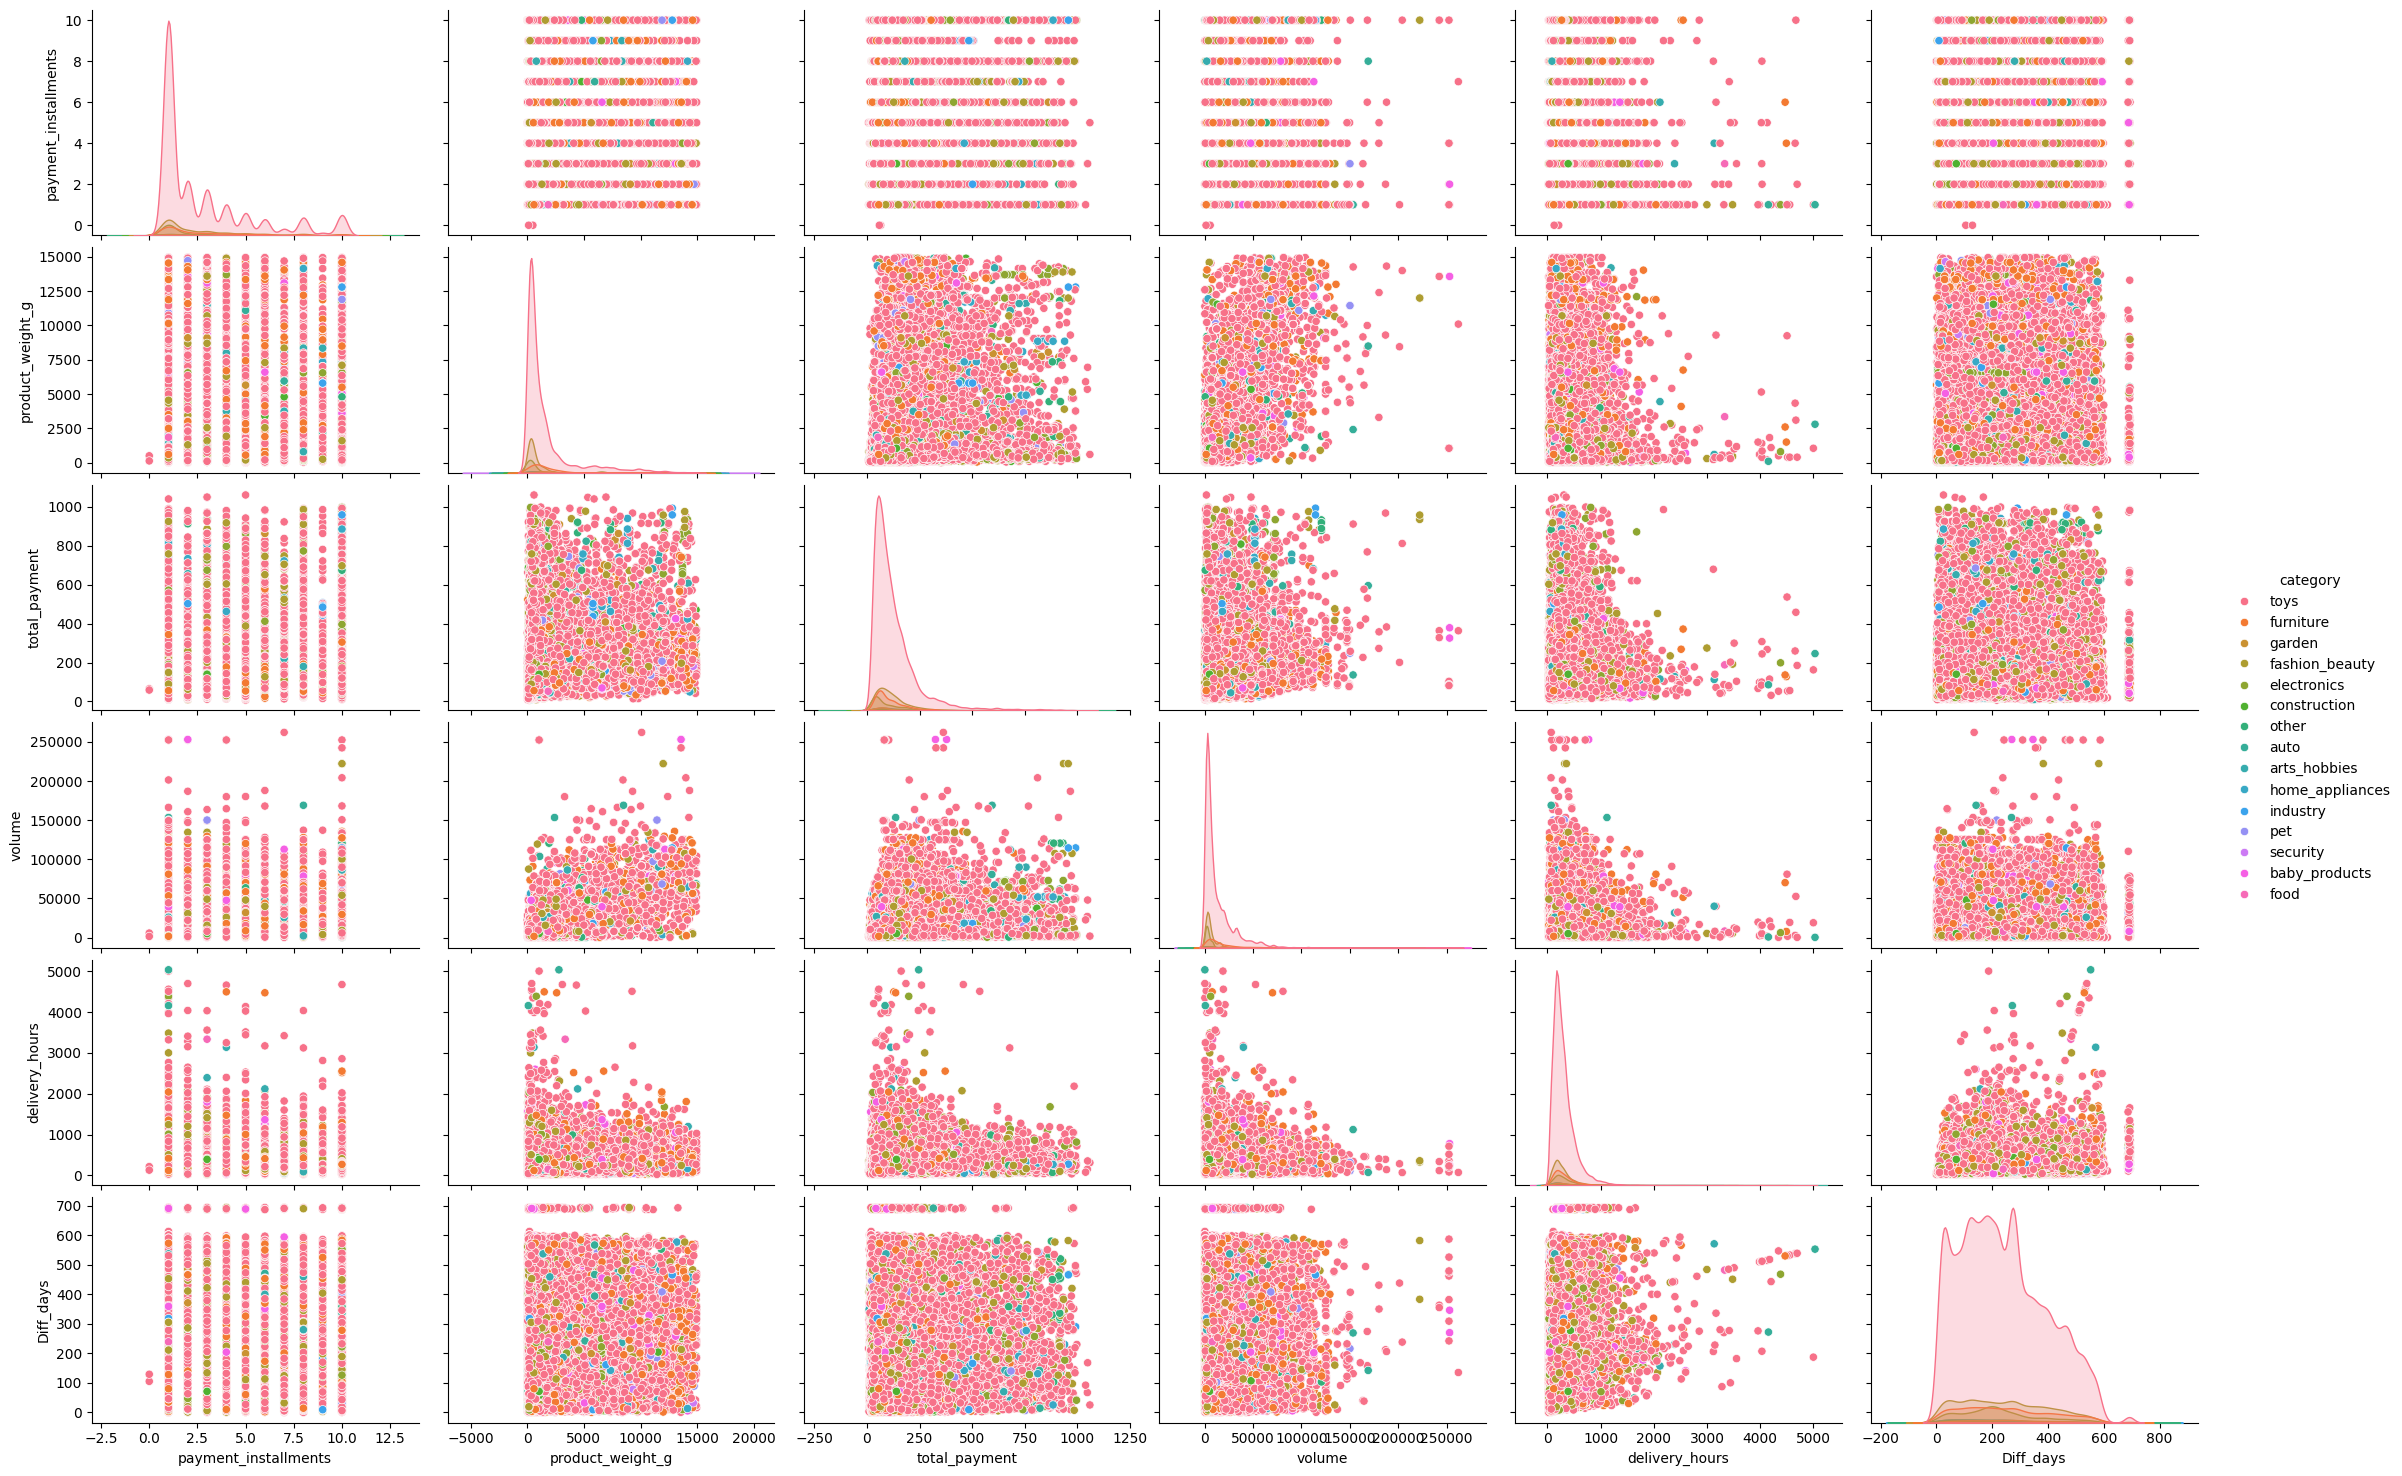

In [17]:
# Let's see our data in a detailed way with pairplot
sns.pairplot(merged_df2.drop('customer_id', axis=1), hue='category', aspect=1.5)
plt.show()

구매 경향 알려면 두 번 이상 구매한 친구들만 빼야 하려나?

고객별 집계 정보 사용하기
customer_id를 직접적으로 사용하지 않더라도, 고객별 행동 데이터를 집계하여 더 유의미한 정보를 생성할 수 있습니다.

예: 고객 집계 정보 생성


customer_features = merged_df.groupby('customer_id').agg({
    'order_id': 'count',       # 총 구매 횟수
    'payment_value': 'mean',   # 평균 결제 금액
    'order_purchase_timestamp': 'nunique',  # 구매 날짜 수
}).reset_index()


merged_df2 = merged_df2.merge(customer_features, on='customer_id', how='left')



In [ ]:
merged_df2

,order_id,payment_type,customer_id,order_item_id,product_id,seller_id,payment_installments,product_weight_g,customer_zip_code_prefix,customer_state,total_payment,volume,category,delivery_hours,Diff_days
0,00010242fe8c5a6d1ba2dd792cb16214,credit_card,871766c5855e863f6eccc05f988b23cb,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2,650.0,28013,RJ,72.19,3528.0,toys,182.0,350
1,000229ec398224ef6ca0657da4fc703e,credit_card,3818d81c6709e39d06b2738a8d3a2474,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,5,3050.0,35661,MG,216.87,14157.0,toys,190.0,227
2,00024acbcdf0a6daa1e931b038114c75,credit_card,af861d436cfc08b2c2ddefd0ba074622,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2,200.0,12952,SP,25.78,2400.0,toys,147.0,21
3,00042b26cf59d7ce69dfabb4e55b4fd9,credit_card,64b576fb70d441e8f1b2d7d446e483c5,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,3,3750.0,13226,SP,218.04,42000.0,toys,602.0,571
4,00048cc3ae777c65dbb7d2a0634bc1ea,wallet,85c835d128beae5b4ce8602c491bf385,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,1,450.0,38017,MG,34.59,2880.0,furniture,160.0,470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92923,fffc94f6ce00a00581880bf54a75a037,wallet,0c9aeda10a71f369396d0c04dce13a64,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,1,10150.0,65077,MA,343.40,53400.0,furniture,416.0,128
92924,fffcd46ef2263f404302a634eb57f7eb,wallet,0da9fe112eae0c74d3ba1fe16de0988b,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,1,8950.0,81690,PR,386.53,44460.0,toys,226.0,46
92925,fffce4705a9662cd70adb13d4a31832d,credit_card,cd79b407828f02fdbba457111c38e4c4,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,3,967.0,4039,SP,116.85,9576.0,toys,115.0,309
92926,fffe18544ffabc95dfada21779c9644f,credit_card,eb803377c9315b564bdedad672039306,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,3,100.0,13289,SP,64.71,8000.0,toys,46.0,379


: 

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from tqdm import tqdm 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 1. 불필요한 컬럼 제거
#X = merged_df2.drop(['order_id'], axis=1)
X = merged_df2.drop(['order_id','seller_id','delivery_hours'], axis=1)

# 2. 원-핫 인코딩
categorical_columns = ['category', 'customer_state', 'product_id', 'payment_type']
#categorical_columns = ['customer_id','category', 'customer_state', 'product_id', 'payment_type','customer_zip_code_prefix']
#categorical_columns = ['customer_id','category', 'customer_state', 'payment_type','customer_zip_code_prefix','product_id','seller_id']
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' is used to avoid the dummy variable trap

# 범주형 인코딩
encoded_features = encoder.fit_transform(X[categorical_columns])
# 데이터프레임으로 만들기
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

# 인코딩된 컬럼으로 교체
X = X.drop(columns=categorical_columns)
X = pd.concat([X, encoded_df], axis=1)


# 3. 결측값 처리 (필요시)
X = X.fillna(0)


# 4. 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Fit and transform the data

In [ ]:
# 5. PCA 적용 (차원 축소)
pca = PCA(n_components=0.95)  # 95% 변동성 보존
X_pca = pca.fit_transform(X)

# PCA 결과 확인 (각 주성분의 설명된 분산 비율)
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")
print(f"Number of components: {X_pca.shape[1]}")

### 3. KMeans 클러스터링 적용 (PCA 변환 후)
PCA로 차원이 축소된 X_pca 데이터를 사용하여 KMeans 클러스터링을 다시 진행합니다.

In [ ]:
# 6. KMeans 클러스터링 (PCA가 적용된 데이터로)
clusters_pca = []

for i in tqdm(range(1, 11), desc="KMeans Clustering", unit="cluster"):
    km_pca = KMeans(n_clusters=i, random_state=42).fit(X_pca)
    clusters_pca.append(km_pca.inertia_)

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters_pca, ax=ax)
ax.set_title('Searching for Elbow (PCA Data)')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(3, clusters_pca[2]), xytext=(3, clusters_pca[2] + 200000),          
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, clusters_pca[4]), xytext=(5, clusters_pca[4] + 200000),          
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

In [20]:
from sklearn.preprocessing import OneHotEncoder


In [ ]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Elbow Point 화살표로 표시해보기
ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',          
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()


ValueError: could not convert string to float: '00010242fe8c5a6d1ba2dd792cb16214'